In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import iris
import time
from cis import read_data, read_data_list, get_variables

In [7]:
emis_dir="/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/Emissions/SOx_allHeights_2018-{}*"

In [4]:
filen=glob.glob('/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/colloc_emission_modis/regridded*')

coll_on=read_data(filen[0],'Cloud_Fraction')

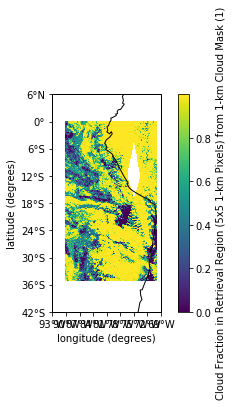

In [61]:
coll_on.plot()

In [8]:
month='01'
emis=read_data(glob.glob(emis_dir.format(month))[0], ['SOx'])

In [66]:
days=['02','03','04','05','06','07','08','09',
      '10','11','12','13','14','15','16','17','18','19',
      '20','21','22','23','24','25','26','27','28','29', '30','31']
for day in days:
    date1=datetime.datetime(2018, int(month), int(day)-1, 18)
    date2=datetime.datetime(2018, int(month), int(day), 18)
    emis_day=emis.subset(time=(date1,date2))
    emis_down_iris=emis_day.regrid(coll_on,iris.analysis.Linear())
    iris.save(emis_down_iris,'/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/colloc_emission_modis/downsampled_emis/{}{}.nc'.format(month, day))

/home/users/pete_nut/miniconda3/lib/python3.8/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


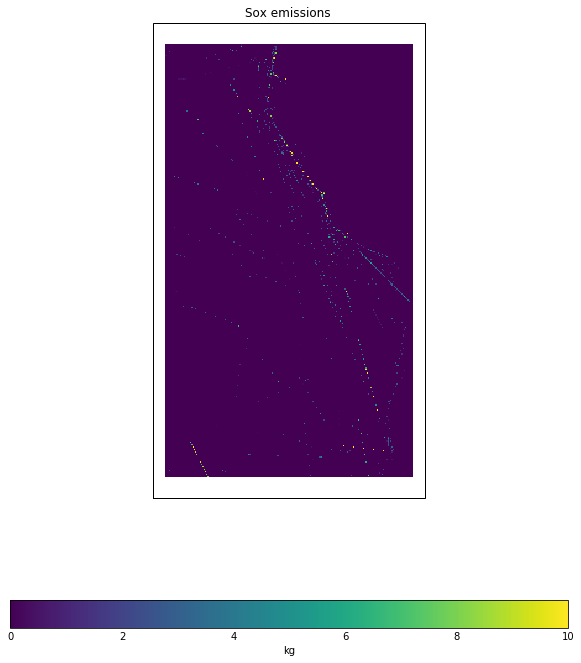

In [60]:
# import iris.quickplot as qplt
# plt.figure(figsize=(10,12.5))
# qplt.pcolormesh(emis_down_iris.collapsed('time', iris.analysis.SUM), cmap='viridis', vmax=10)
# qplt.show()